In [6]:
import torch
import cv2
import easyocr

In [2]:
torch.cuda.is_available()

True

In [3]:
model = torch.hub.load('./', 'custom', path='./best.pt', source='local')

YOLOv5  v6.2-250-g467a57f Python-3.9.7 torch-1.13.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [84]:
# Images
img_path = './data/images/car2.jpg'  # or file, Path, PIL, OpenCV, numpy, list
img = cv2.imread(img_path)

# Inference
results = model(img)

# Results
# x = results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

In [92]:
render = results.render()
img_with_boxes = render[0]

[array([[[214, 224, 234],
         [214, 224, 234],
         [214, 224, 234],
         ...,
         [231, 236, 239],
         [231, 236, 239],
         [231, 236, 239]],
 
        [[214, 224, 234],
         [214, 224, 234],
         [214, 224, 234],
         ...,
         [231, 236, 239],
         [231, 236, 239],
         [231, 236, 239]],
 
        [[214, 224, 234],
         [214, 224, 234],
         [214, 224, 234],
         ...,
         [231, 236, 239],
         [231, 236, 239],
         [231, 236, 239]],
 
        ...,
 
        [[ 46,  40,  33],
         [ 46,  40,  33],
         [ 47,  41,  34],
         ...,
         [ 35,  29,  22],
         [ 37,  31,  24],
         [ 37,  31,  24]],
 
        [[ 42,  36,  29],
         [ 41,  35,  28],
         [ 39,  33,  26],
         ...,
         [ 41,  35,  28],
         [ 42,  36,  29],
         [ 42,  36,  29]],
 
        [[ 40,  34,  27],
         [ 37,  31,  24],
         [ 35,  29,  22],
         ...,
         [ 42,  36,  29],
  

In [55]:
results.crop()

Saved 1 image to runs\detect\exp19
Saved results to runs\detect\exp19



[]

In [32]:
cropped = imgs[round(results.pandas().xyxy[0]['ymin'][0]):round(results.pandas().xyxy[0]['ymax'][0]),round(results.pandas().xyxy[0]['xmin'][0]):round(results.pandas().xyxy[0]['xmax'][0])]

In [96]:
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture(0)
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(True):
  # cap = cv2.VideoCapture("./data/images/car2.jpg")
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
 
    # Display the resulting frame
    z = model(frame)
    cv2.imshow('Frame',z.render()[0])
 
    # Press Q on keyboard to  exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else: 
    break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

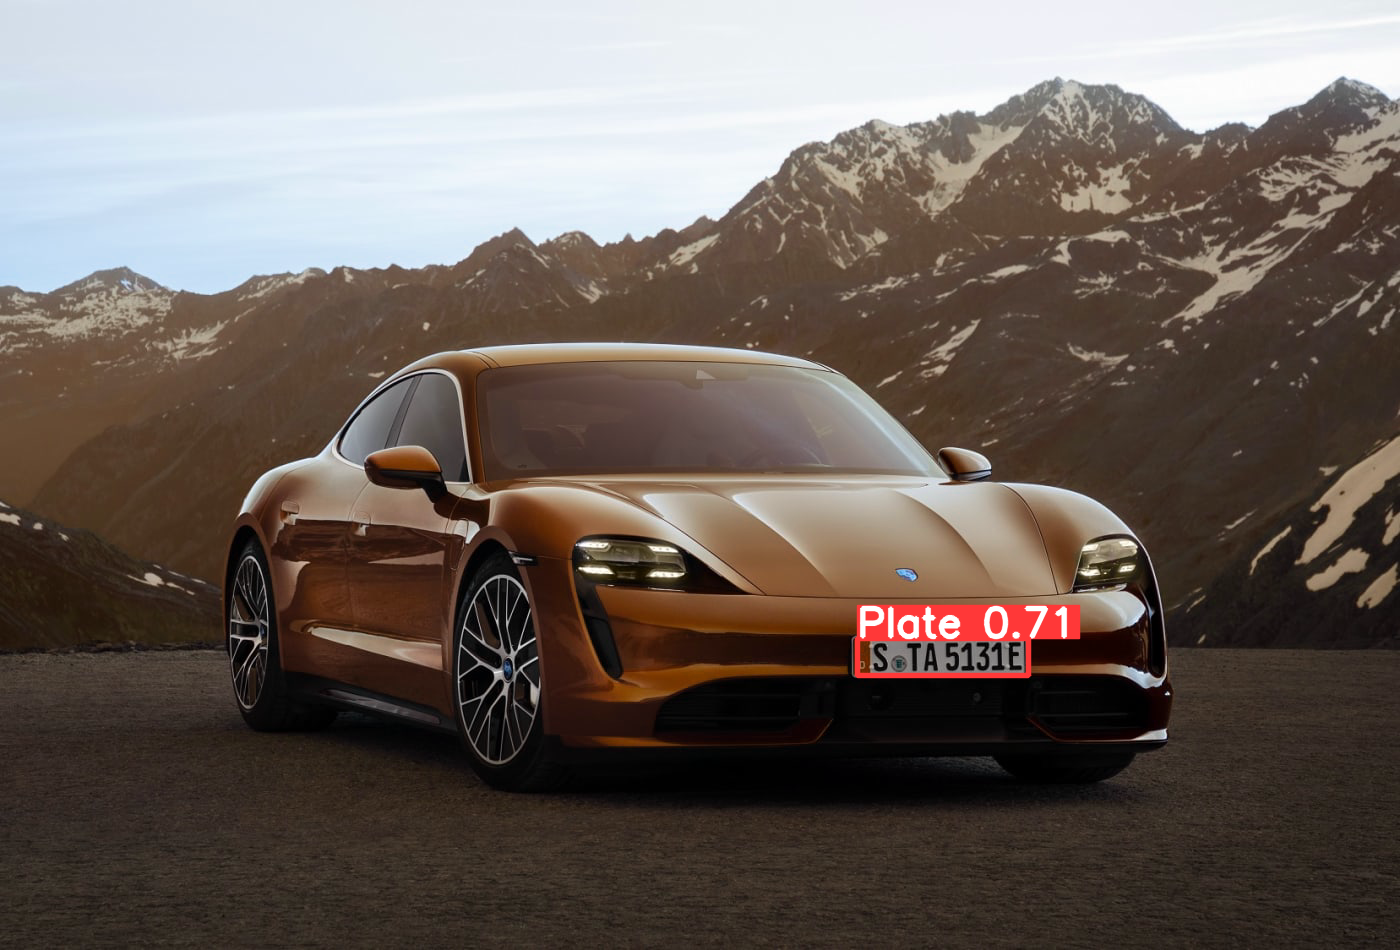

In [67]:
results.show()

In [88]:
cv2.imshow('img', img_with_boxes)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
img = cv2.cvtColor(x, 0)

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [76]:
x = results.render()

In [7]:
reader = easyocr.Reader(['en'])

In [9]:
# img_gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
result = reader.readtext(x)
plate_number_detected = result[0][1].replace(" ", "")
print(plate_number_detected)

AB5605
